### 1. 目标函数的定义

#### 1.1 Ackley函数:

$$
f\left(x_{0} \cdots x_{n}\right)=-20 \exp \left(-0.2 \sqrt{\frac{1}{n} \sum_{i=1}^{n} x_{i}^{2}}\right)-\exp \left(\frac{1}{n} \sum_{i=1}^{n} \cos \left(2 \pi x_{i}\right)\right)+20+e
$$

$$ -30<x_{i}<30 $$

#### 1.2 代码实现：

In [1]:
import numpy as np
import random

def Ackley(x):
    # 检查输入是否为 numpy-array 
    if not isinstance(x, np.ndarray): 
        x = np.asarray(x)   
    dim = x.shape[-1]
    return -20.0 * np.exp(
        -0.2 * np.linalg.norm(x, axis=-1) / np.sqrt(dim)
        ) - np.exp(np.sum(np.cos(2 * np.pi * x),
        axis=-1) / dim) + 20 + np.e

#### 1.3 参数：

In [2]:
LB, UB = -30, 30                    # 输入变量的取值范围
N_DIM = 10                          # 输入变量的维度
SIZE_POP = 50                       # 种群规模
MAX_ITER = 50                       # 迭代次数
MP = 0.01                           # 变异概率
ELITE_NUM = 2                       # 精英保留数量

### 2.遗传算法中的方法定义

In [3]:
def randomF(low, up, shape): # 生成随机浮点数
    return np.random.ranf(shape)*(up-low)+low

def initializaion(): # 初始化种群
    return [randomF(LB, UB, [N_DIM]) for _ in range(SIZE_POP)]

def generate(parents, weights, mp=0): # 交配
    offspring = []
    while len(offspring) < (len(parents) - ELITE_NUM):
        p1,p2 = random.choices(parents, weights, k=2)
        offspring.extend(crossover(p1, p2, mp))
    return offspring

def crossover(a, b, mp=0): # 交配中的基因交叉,目前实现是每个位点随机交叉
    choice = np.random.randint(0, 2, a.shape)
    a1 = a.copy()
    a2 = a.copy()
    b1 = b.copy()
    b2 = b.copy()
    a1[choice==0] = 0
    b1[choice==1] = 0 
    a2[choice==1] = 0
    b2[choice==0] = 0 
    return mutation(a1 + b1, mp), mutation(a2 + b2, mp)

def mutation(a, mp): # 交配中的基因变异
    _mp = int(100*mp) # 变异概率阈值
    idx = np.random.randint(0, 100, a.shape) < _mp 
    mutation = randomF(LB, UB, a.size)
    a[idx] = mutation[idx]
    return a

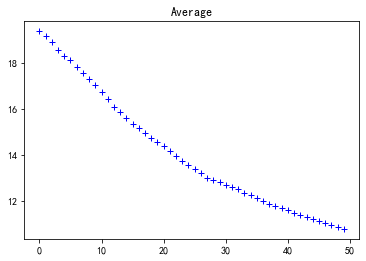

In [7]:

i = 0
Y_history = []
minY = [[] for _ in range(MAX_ITER)]
for _test in range(100):
    x = initializaion()
    for _ in range(MAX_ITER):
        y = Ackley(x)       # 计算y值
        minY[_].append(np.min(y)) # 记录每一代的表现情况
        # 选取精英
        elite = [x[i] for i in np.argsort(y)[:ELITE_NUM]]
        score = np.max(y)+10-y   # 适应度
        x = generate(x, score, 0.01)
        x = x + elite
        # print("%d ITER_%d\tMin=%.4f\tAvg=%.4f"%(len(x), i,np.min(y),np.average(y)))
from matplotlib import pyplot as plt
avgY = [np.average(i) for i in minY]
# minY = [np.min(i) for i in Y_history]
idx = np.arange(MAX_ITER)
# fig, ax = plt.subplots(2, 1)
# plt.subplot(3,1,1)
plt.plot(idx, avgY, '+', color='blue')
plt.title("Average")
# plt.subplot(3,1,3)
# plt.plot(idx, minY, '+', color='blue')
# plt.title("Minimum")

plt.show()

In [5]:
from sko.GA import GA
# Lower bound
lb = [-30 for i in range(10)]
# Upper bound
ub = [30 for i in range(10)]


minYY = [[] for _ in range(50)]
for i in range(100):
        ga = GA(func=Ackley,
                n_dim=10,
                size_pop=50,
                max_iter=50,
                prob_mut=0.01,
                lb=lb, ub=ub,
                precision=1e-7)
        best_x, best_y = ga.run()
        for _ in range(50):
                minYY[_].append(np.min(ga.all_history_Y[_]))
skoY =[np.average(i) for i in minYY]

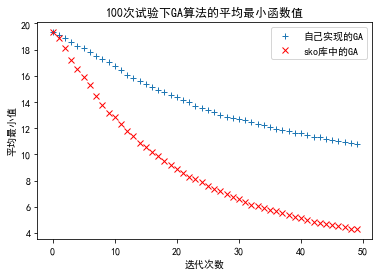

In [11]:
plt.rcParams['font.family']=['simhei']
plt.rcParams['axes.unicode_minus'] = False
fig,ax = plt.subplots()
ax.plot(idx, avgY, '+', label='自己实现的GA')
ax.plot(idx, skoY, 'x', color='red', label='sko库中的GA')
ax.set_xlabel('迭代次数') #设置x轴名称 x label
ax.set_ylabel('平均最小值') #设置y轴名称 y label
ax.set_title('100次试验下GA算法的平均最小函数值') #设置图名为Simple Plot
ax.legend() #自动检测要在图例中显示的元素，并且显示
plt.savefig('./compare.svg', dpi=300)
plt.show()
